## Tabla de Contenidos

1. <a href='#section_Importacion_de_modules'>Importación de modules</a>
2. <a href='#section_Importacion_de_dataset'>Importación del dataset patient_covid.csv</a>
3. <a href='#section_Modelos'>Machine Learning Algorithms</a> 
4. <a href='#section_Conclusiones'>Conclusiones</a> 

origen del dataset = https://www.kaggle.com/datasets/riteshahlawat/covid19-mexico-patient-health-dataset



# **1. Importación de *modules***
<a id="section_Importacion_de_modules"></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.model_selection import StratifiedKFold , KFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score ,f1_score 
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score
from sklearn.preprocessing import normalize, StandardScaler ,binarize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")

import funciones as f
import time

!pip install graphviz
!pip install pydotplus

from IPython.display import Image
import pydotplus


***Variables generales***

In [2]:
_random_state=40
tic_general = time.time()

# **2. Importación del dataset patient_covid.csv**
<a id="section_Importacion_de_dataset"></a>

In [3]:
data_covid = pd.read_csv("../data/patient_covid.csv", sep = ",", low_memory=False) 
f._get_info(data_covid)

(95244, 29)


inpatient  agegroup_10-19  agegroup_20-29  agegroup_30-39  agegroup_40-49  \
0          0               0               0               0               1   
1          0               0               0               0               0   
2          1               0               0               0               0   

   agegroup_50-59  agegroup_60-69  agegroup_70-79  agegroup_80-89  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   

   agegroup_90-99  ...  diabetes_Y  hypertension_Y  immunosuppression_Y  \
0               0  ...           0               0                    0   
1               0  ...           0               0                    0   
2               0  ...           1               1                    0   

   obesity_Y  other_diseases_NOA  other_diseases_Y  pneumonia_Y  pregnant_Y  \
0          0                   0                 0            0           0   
1          0                   0                 0            0           0   
2          1                   0                 0            0           0   

   sex_M  smoker_Y  
0      1         0  
1      0         0  
2      1         0  

[3 rows x 29 columns]

<a id="section_Modelos"></a>
# **3.Machine Learning Algorithms**


## **3.1. Preparar la matriz de _features_ y el vector _target y Train-test_** <a id="section_rl"></a>



In [4]:
data_covid['inpatient'].value_counts(normalize=True)

0    0.734629
1    0.265371
Name: inpatient, dtype: float64

In [5]:
X = data_covid.drop(["inpatient"],axis=1)
y = data_covid['inpatient']
#f._get_info(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=data_covid['inpatient'],random_state=_random_state)
display(y_train.value_counts(normalize=True).round(3))
display(y_test.value_counts(normalize=True).round(3))

print ("X_train:" , X_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , X_test.shape[0])
print ("y_test:" , y_test.shape[0])

0    0.735
1    0.265
Name: inpatient, dtype: float64

0    0.735
1    0.265
Name: inpatient, dtype: float64

X_train: 57146
y_train: 57146
X_test: 38098
y_test: 38098


## **3.2 Modelos con parámetros por defecto**

### 3.2.1 Entrenamiento y Scoring

In [7]:
#Naive Bayes      
nb=MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
score_nb = accuracy_score(y_test,y_pred_nb).round(4)

#Tree Classification
clftree = tree.DecisionTreeClassifier(random_state=_random_state)
clftree.fit(X_train, y_train)
y_pred_t = clftree.predict(X_test)
score_t = accuracy_score(y_test, y_pred_t).round(4)

#--------scaler -----------
#scaler = StandardScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)

#KNN (acá no especificamos n_neighbors y queda el que viene por defecto)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn=accuracy_score(y_test, y_pred_knn).round(4)

#Logistic regression (con StandarScaler)
lr = LogisticRegression(class_weight="balance")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
score_lr= accuracy_score(y_test, y_pred_lr).round(4)

#Scores
print ("Naive Bayes Acc Score:    \t",score_nb)
print ("KNN Acc Score:\t\t\t", score_knn)
print ("Logistic Regression Acc Score:  ", score_lr)
print ("Tree classification Acc Score:  ", score_t)

MultinomialNB()

DecisionTreeClassifier(random_state=40)

KNeighborsClassifier()

LogisticRegression(class_weight='balance')

Naive Bayes Acc Score:    	 0.8503
KNN Acc Score:			 0.8621
Logistic Regression Acc Score:   0.8738
Tree classification Acc Score:   0.8664


### 3.2.2 Confusion_matrix

<img src="http://acnalert.eastus.cloudapp.azure.com/2/ds/Confusion.jpg" alt="Matriz confusion">

In [8]:
print ("X_test:" , X_test.shape[0])
print ("y_test:" , y_test.shape[0])
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))
print("CM KNN:\n",confusion_matrix(y_test, y_pred_knn))
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))
print("T LR:\n",  confusion_matrix(y_test, y_pred_t))

X_test: 38098
y_test: 38098
CM NB:
 [[26012  1976]
 [ 3727  6383]]
CM KNN:
 [[26175  1813]
 [ 3439  6671]]
CM LR:
 [[26805  1183]
 [ 3625  6485]]
T LR:
 [[26652  1336]
 [ 3754  6356]]


[[68.28  5.19]
 [ 9.78 16.75]]


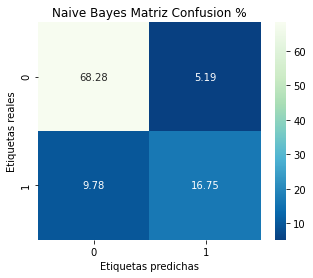

In [9]:
f._print_matriz_confusion(y_test, y_pred_nb,"Naive Bayes Matriz Confusion %", 'all')

[[68.7   4.76]
 [ 9.03 17.51]]


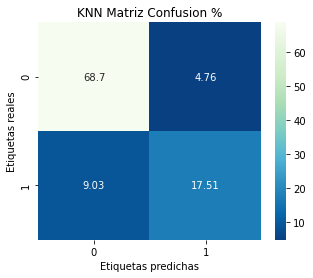

In [10]:
f._print_matriz_confusion(y_test, y_pred_knn,"KNN Matriz Confusion %", 'all')

[[70.36  3.11]
 [ 9.51 17.02]]


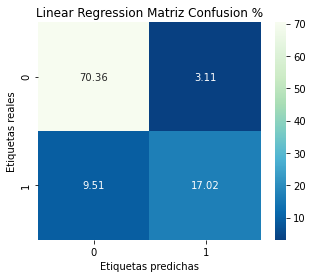

In [11]:
f._print_matriz_confusion(y_test, y_pred_lr,"Linear Regression Matriz Confusion %", 'all')

[[69.96  3.51]
 [ 9.85 16.68]]


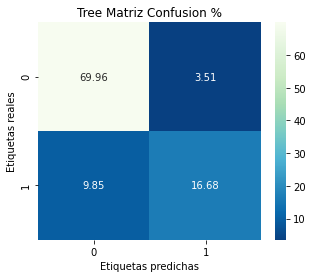

In [12]:
f._print_matriz_confusion(y_test, y_pred_t,"Tree Matriz Confusion %", 'all')

### 3.2.3 Recall, Precision and F-1 Score

* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [13]:
print("NB:\n", classification_report(y_test,y_pred_nb))
print("KNN:\n", classification_report(y_test,y_pred_knn))
print("LR:\n", classification_report(y_test,y_pred_lr))
print("T:\n", classification_report(y_test,y_pred_t))

NB:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     27988
           1       0.76      0.63      0.69     10110

    accuracy                           0.85     38098
   macro avg       0.82      0.78      0.80     38098
weighted avg       0.85      0.85      0.85     38098

KNN:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     27988
           1       0.79      0.66      0.72     10110

    accuracy                           0.86     38098
   macro avg       0.84      0.80      0.81     38098
weighted avg       0.86      0.86      0.86     38098

LR:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     27988
           1       0.85      0.64      0.73     10110

    accuracy                           0.87     38098
   macro avg       0.86      0.80      0.82     38098
weighted avg       0.87      0.87      0.87     38098

T:


In [14]:
print ("F1 Score NB: ", f1_score(y_test,y_pred_nb).round(4))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn).round(4))
print ("F1 Score LR: ", f1_score(y_test,y_pred_lr).round(4))
print ("F1 Score T:  ", f1_score(y_test,y_pred_t).round(4))

F1 Score NB:  0.6912
F1 Score KNN: 0.7175
F1 Score LR:  0.7296
F1 Score T:   0.7141


### 3.2.4 ROC & AUC

In [15]:
def _metric_AUC(X_t,y_t,modelo):  # return roc_auc,fpr,tpr,threshold
    probs=modelo.predict_proba(X_t)
    preds=probs[:,1]
    fpr,tpr,threshold=metrics.roc_curve(y_t, preds)
    roc_auc=metrics.auc(fpr,tpr)
    return roc_auc,fpr,tpr,threshold

# return roc_auc,fpr,tpr,threshold
#NB
roc_auc_nb,fpr_nb,tpr_nb,threshold_nb=_metric_AUC(X_test,y_test,nb)
#KNN
roc_auc_knn,fpr_knn,tpr_knn,threshold_knn=_metric_AUC(X_test,y_test,knn)
#LR
roc_auc_lr,fpr_lr,tpr_lr,threshold_lr=_metric_AUC(X_test,y_test,lr)
#T
roc_auc_t,fpr_t,tpr_t,threshold_t=_metric_AUC(X_test,y_test,clftree)
print ("ROC AUC NB:  ",  roc_auc_nb.round(4) )  #,  threshold_nb.round(4)
print ("ROC AUC KNN: ", roc_auc_knn.round(4) )
print ("ROC AUC LR:  ",  roc_auc_lr.round(4) )
print ("ROC AUC T:   ",   roc_auc_t.round(4) )

ROC AUC NB:   0.866
ROC AUC KNN:  0.8432
ROC AUC LR:   0.8912
ROC AUC T:    0.849


Text(0.5, 1.0, 'ROC')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'Sensivity - True Positive Rate')

Text(0.5, 0, '(1-Specifity) - False Positive Rate')

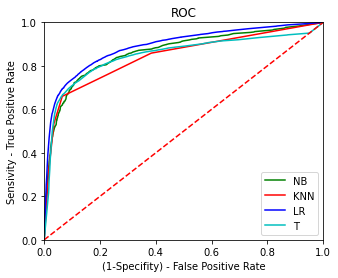

In [16]:
plt.title("ROC")
plt.rcParams['figure.figsize'] = (19, 6)
# return roc_auc,fpr,tpr,threshold
plt.plot(fpr_nb, tpr_nb, 'g', label="NB" )
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN" )
plt.plot(fpr_lr, tpr_lr, 'b', label="LR" )
plt.plot(fpr_t, tpr_t, 'c', label="T" )

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensivity - True Positive Rate')
plt.xlabel('(1-Specifity) - False Positive Rate')
plt.show()

## **3.3 Optimización de parámetros**
***con gridsearch random  cada uno de los modelos por sparado  ( sin bayes)***




### ***3.3.0 configuracion general para toods los gridsearch***

In [17]:
# Definimos la estrategia de validación cruzada
#kf = KFold(n_splits=10, shuffle=True, random_state=_random_state)
kf=StratifiedKFold(n_splits=10, random_state=_random_state, shuffle=True)
_n_jobs=-1
_scoring='accuracy'
grids = []


### ***3.3.1 Tree Classification***

#### 3.3.1.1 Grafico previo a optimización 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.163995 to fit



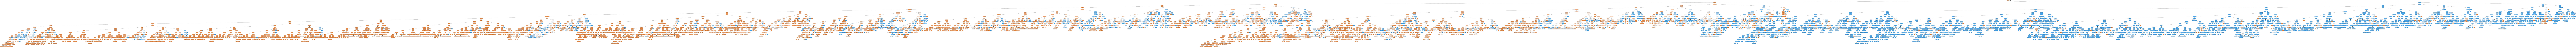

In [18]:
dot_data= tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 3.3.1.2 GridSearch para Tree Classification

In [19]:
_params_tree = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,None],
                "min_samples_split": [2, 3, 4,None]}
clftree = tree.DecisionTreeClassifier(random_state=_random_state)

In [20]:
grid_search_tree = GridSearchCV(estimator=clftree, 
                                param_grid=_params_tree,
                                n_jobs=_n_jobs,
                                cv=kf,
                                scoring=_scoring)
fit = grid_search_tree.fit(X_train, y_train)
grids.append(fit)

print (grid_search_tree.best_score_)
print (grid_search_tree.best_params_ )
print(grid_search_tree.best_estimator_)

0.8712771596585078
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=40)


#### 3.3.1.3 Grafico post optimización

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, random_state=40)

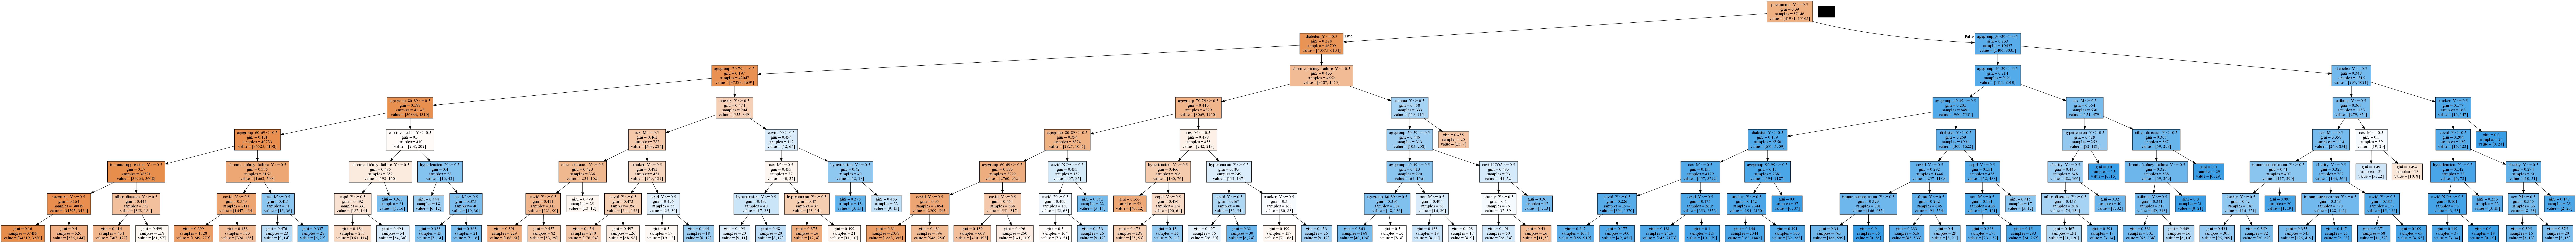

In [21]:
clftree = tree.DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 15, max_depth = 7, min_samples_split = 2, random_state=_random_state)
clftree.fit(X_train, y_train)
score_t = clftree.score(X_test, y_test)

dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### **3.3.2 Logistic Regression**


#### ***3.3.2.1 Summary of Feature Importance***

<BarContainer object of 28 artists>

Text(0.5, 1.0, 'Barplot Summary of Feature Importance')

Text(0.5, 0, 'score')

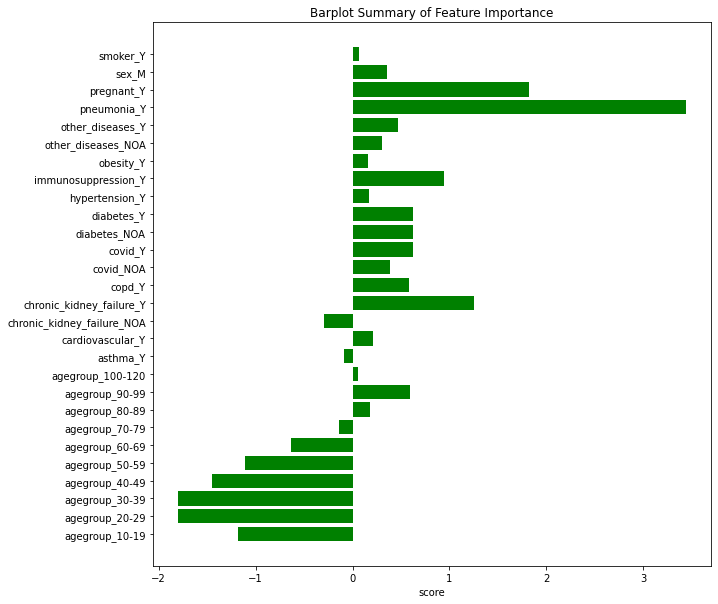

In [22]:
importance = lr.coef_.flatten()

plt.rcParams["figure.figsize"] =(10,10)
plt.barh(X.columns,importance,color="g")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

#### ***3.3.2.2 Regularización***

In [23]:
#Best C
lr_reg = LogisticRegression(solver= 'liblinear', penalty='l1', C=0.1)
lr_reg.fit(X_train,y_train)
y_pred_lr_reg = lr_reg.predict(X_test)
score_lr_reg= accuracy_score(y_test, y_pred_lr_reg).round(4)
score_lr_reg

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

0.8736

#### ***3.3.2.3 Feature importance post regularización***

<BarContainer object of 28 artists>

Text(0.5, 1.0, 'Barplot Summary of Feature Importance')

Text(0.5, 0, 'score')

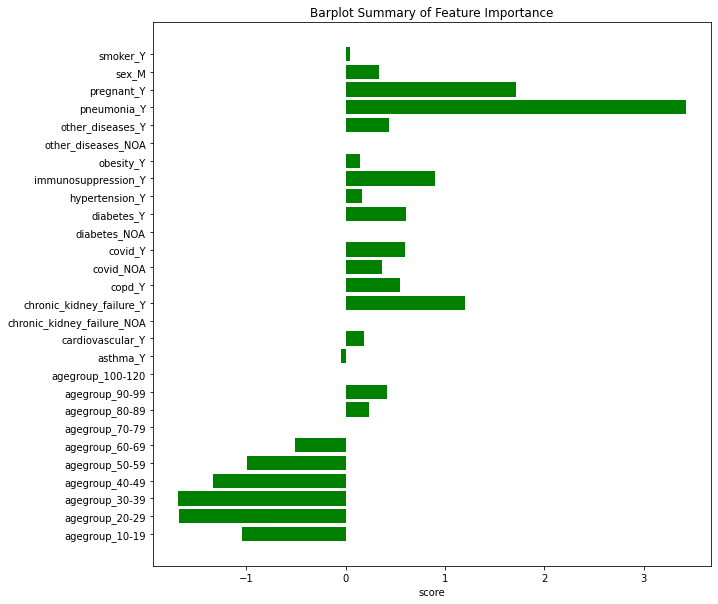

In [24]:
importance = lr_reg.coef_.flatten()

plt.rcParams["figure.figsize"] =(10,10)
plt.barh(X.columns,importance,color="g")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

#### ***3.3.2.4 Gridsearch para Logistic regression***

In [25]:
#lr_reg = LogisticRegression(solver= 'liblinear', penalty='l1', C=0.01)
_params_LogR= {'C': [0.01,0.1,1, 10, 100, 1000],
               'penalty': ['l1','l2','none'],
               'solver': ['saga','liblinear']}
_LogR = LogisticRegression()

In [26]:
grid_search_LogR = GridSearchCV(estimator=_LogR, 
                                param_grid=_params_LogR,
                                n_jobs=_n_jobs,
                               cv=kf,
                                scoring=_scoring)
fit = grid_search_LogR.fit(X_train, y_train)

print (grid_search_LogR.best_score_)
print (grid_search_LogR.best_params_)
print(grid_search_LogR.best_estimator_)

grids.append(fit)

0.8713996106629478
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [27]:
def _metric_threshold(X_tst, y_tst, y_prd, modelo, umbral = 0.5):
    y_pred_proba = modelo.predict_proba(X_tst)
    print(f'''Matriz original (th = 0.5, acc = {accuracy_score(y_tst, y_prd).round(4)}) 
    {confusion_matrix(y_tst, y_prd,normalize='all').round(4)*100}''')
    
    for i in umbral:
        y_pred_umb = binarize(y_pred_proba, threshold = i)[:, 1]
        print(f''' 
        Matriz umbral (th = {i.round(2)}, acc = {accuracy_score(y_tst, y_pred_umb).round(4)})
        {confusion_matrix(y_tst, y_pred_umb,normalize='all').round(4)*100}''')


In [28]:
_metric_threshold(X_test,y_test,y_pred_lr_reg,lr_reg,umbral =np.linspace(0.20,0.40,11))

Matriz original (th = 0.5, acc = 0.8736) 
    [[70.46  3.01]
 [ 9.63 16.91]]
 
        Matriz umbral (th = 0.2, acc = 0.826)
        [[61.33 12.13]
 [ 5.27 21.27]]
 
        Matriz umbral (th = 0.22, acc = 0.8413)
        [[63.59  9.88]
 [ 5.99 20.55]]
 
        Matriz umbral (th = 0.24, acc = 0.8477)
        [[64.56  8.91]
 [ 6.33 20.21]]
 
        Matriz umbral (th = 0.26, acc = 0.851)
        [[65.21  8.25]
 [ 6.65 19.88]]
 
        Matriz umbral (th = 0.28, acc = 0.8626)
        [[67.08  6.38]
 [ 7.35 19.18]]
 
        Matriz umbral (th = 0.3, acc = 0.8663)
        [[67.68  5.78]
 [ 7.59 18.95]]
 
        Matriz umbral (th = 0.32, acc = 0.8697)
        [[68.32  5.14]
 [ 7.89 18.65]]
 
        Matriz umbral (th = 0.34, acc = 0.8712)
        [[68.7   4.77]
 [ 8.11 18.43]]
 
        Matriz umbral (th = 0.36, acc = 0.8726)
        [[69.13  4.33]
 [ 8.41 18.12]]
 
        Matriz umbral (th = 0.38, acc = 0.8726)
        [[69.33  4.14]
 [ 8.6  17.94]]
 
        Matriz umbral (th = 0.4, ac

Los modelos por default dan casi 10% de FN y 3% de FP, si el cliente prefiere internar gente de más o de menos podemos jugar con umbrales entre 0.24 (6% FN, 9% FP, acc = 0.8477) y 0.5 (valores por default).

### **3.3.3 KNN**
Optimizando el valor de k con gridsearch*Optimizando el valor de k con gridsearch*

<div class="alert alert-block alert-info">
<b>Comentario:</b> hicomos el gridsearch en un rango de 1 a 31 . y luego, sabuiendo el mejor K , camniamos el rango de 10 a 21 . para reducir el tiempo de corrida del notebook
</div>

In [29]:
_params_knn = {'n_neighbors': range(10,21),
          'weights' : ['uniform', 'distance'],
           'p' : [1, 2, 3]}
knn = KNeighborsClassifier()

In [30]:
grid_search_knn = GridSearchCV(estimator=knn, 
                                param_grid=_params_knn,
                                n_jobs=_n_jobs,
                               cv=kf,
                                scoring=_scoring)
fit = grid_search_knn.fit(X_train, y_train)

print (grid_search_knn.best_score_)
print (grid_search_knn.best_params_ )
print(grid_search_knn.best_estimator_)

grids.append(fit)

0.8691248092588356
{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13, p=1)


### ***3.3.4 Resumen de gridsearch**

In [31]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.8712771596585078
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=40)
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.8713996106629478
LogisticRegression(C=10, penalty='l1', solver='liblinear')
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.8691248092588356
KNeighborsClassifier(n_neighbors=13, p=1)
{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}


## **3.5 Modelos con parámetros optimizados**

### ***3.5.1 classification_report optimizados***
Recall, Precision and F-1 Score¶
* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [32]:
y_preds_tree = grids[0].predict(X_test)  # tree
y_preds_log = grids[1].predict(X_test)  # logistica
y_preds_knn = grids[2].predict(X_test)  # knn

print("clasification tree \n")
print (classification_report(y_test, y_preds_log))
print("logistic regression \n")
print (classification_report(y_test, y_preds_log))
print("knn \n")
print (classification_report(y_test, y_preds_log))
print("Naive Bayes (no optimizacion")
print("NB:\n", classification_report(y_test,y_pred_nb))  

clasification tree 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     27988
           1       0.85      0.64      0.73     10110

    accuracy                           0.87     38098
   macro avg       0.86      0.80      0.82     38098
weighted avg       0.87      0.87      0.87     38098

logistic regression 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     27988
           1       0.85      0.64      0.73     10110

    accuracy                           0.87     38098
   macro avg       0.86      0.80      0.82     38098
weighted avg       0.87      0.87      0.87     38098

knn 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     27988
           1       0.85      0.64      0.73     10110

    accuracy                           0.87     38098
   macro avg       0.86      0.80      0.82     38098
weighted avg       0.87  

### ***3.5.2 Matriz de confusion optimizados***

In [33]:
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))  #usando el que no lleva optimizacion
print("CM KNN:\n",confusion_matrix(y_test, y_pred_knn))
print("CM LogR:\n", confusion_matrix(y_test, y_preds_log))
print("CM TREE:\n",  confusion_matrix(y_test, y_preds_tree))

CM NB:
 [[26012  1976]
 [ 3727  6383]]
CM KNN:
 [[26175  1813]
 [ 3439  6671]]
CM LogR:
 [[26804  1184]
 [ 3625  6485]]
CM TREE:
 [[26643  1345]
 [ 3514  6596]]


[[68.28  5.19]
 [ 9.78 16.75]]


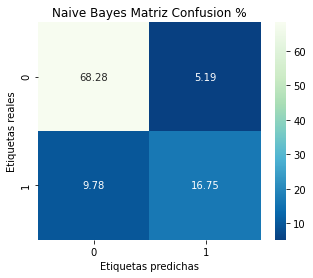

In [34]:
f._print_matriz_confusion(y_test, y_pred_nb,"Naive Bayes Matriz Confusion %", 'all')

[[68.7   4.76]
 [ 9.03 17.51]]


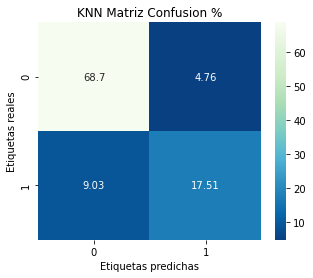

In [35]:
f._print_matriz_confusion(y_test, y_pred_knn,"KNN Matriz Confusion %", 'all')

[[70.36  3.11]
 [ 9.51 17.02]]


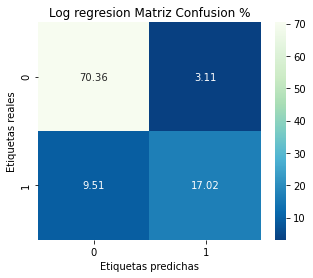

In [36]:
f._print_matriz_confusion(y_test, y_preds_log,"Log regresion Matriz Confusion %", 'all')

[[69.93  3.53]
 [ 9.22 17.31]]


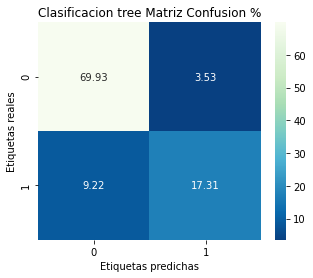

In [37]:
f._print_matriz_confusion(y_test, y_preds_tree,"Clasificacion tree Matriz Confusion %", 'all')

### ***3.4.3 Recall, Precision and F-1 Score***


In [38]:
print ("F1 Score NB:", f1_score(y_test,y_pred_nb).round(4))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn).round(4))
print ("F1 Score LR:", f1_score(y_test,y_preds_log).round(4))
print ("F1 Score T:", f1_score(y_test,y_preds_tree).round(4))

F1 Score NB: 0.6912
F1 Score KNN: 0.7175
F1 Score LR: 0.7295
F1 Score T: 0.7308


### 3.4.4 ROC & AUC

In [39]:
# return roc_auc,fpr,tpr,threshold
#NB
roc_auc_nb,fpr_nb,tpr_nb,threshold_nb=_metric_AUC(X_test,y_test,nb)
#KNN
roc_auc_knn,fpr_knn,tpr_knn,threshold_knn=_metric_AUC(X_test,y_test,grid_search_knn)
#LR
roc_auc_log,fpr_lr,tpr_lr,threshold_lr=_metric_AUC(X_test,y_test,grid_search_LogR)
#T
roc_auc_tree,fpr_t,tpr_t,threshold_t=_metric_AUC(X_test,y_test,grid_search_tree)

print ("ROC AUC NB:  ", roc_auc_nb.round(4))
print ("ROC AUC KNN: ", roc_auc_knn.round(4))
print ("ROC AUC LogR:", roc_auc_log.round(4))
print ("ROC AUC TREE:", roc_auc_tree.round(4))

ROC AUC NB:   0.866
ROC AUC KNN:  0.866
ROC AUC LogR: 0.8912
ROC AUC TREE: 0.8879


Text(0.5, 1.0, 'ROC optimizado')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'Sensivity - True Positive Rate')

Text(0.5, 0, '(1-Specifity) - False Positive Rate')

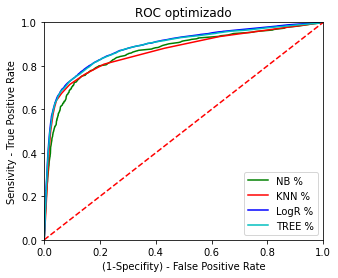

In [40]:
plt.title("ROC optimizado")
plt.rcParams['figure.figsize'] = (22,8)
# return roc_auc,fpr,tpr,threshold
plt.plot(fpr_nb, tpr_nb, 'g', label="NB % ")
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN %" )
plt.plot(fpr_lr, tpr_lr, 'b', label="LogR %")
plt.plot(fpr_t, tpr_t, 'c', label="TREE %" )

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensivity - True Positive Rate')
plt.xlabel('(1-Specifity) - False Positive Rate')
plt.show()

***

<a id="section_Conclusiones"></a>
# **4.Conclusiones**


In [41]:
toc_general = time.time()
print(str((toc_general-tic_general)/60) + ' Minutos todo el notebook(con 12 logical processors)')

43.096730597813924 Minutos todo el notebook(con 12 logical processors)


Optimización:
* LR: feature selection con penalización y tuneo de C
* Tree: GridSearchCV de best params
* Knn: GridSearchCV de best params

|ROC AUC|pre optimización|post optimización|
|---|---|---|
| NB:|0.866|0.866|
| KNN:|0.8432|0.866|
| LogR:|0.8912|0.8912|
| Tree:|0.849|0.8879|


Mejoró ligeramente la performance de los modelos en orden KNN, Tree y LR

Respecto de los resultados de cada modelo:
|CM NB %:|||
|---|---|---|
||N|P|
N|68.28  |5.19    |
P|9.78   |16.75   |

|CM KNN %:|||
|---|---|---|
||N|P|
N|68.7   |4.76    |
P|9.03   |17.51   |

|CM LogR %:|||
|---|---|---|
N|70.36  |3.11    |
P|9.51   |17.02   |

|CM Tree %:|||
|---|---|---|
N|69.93  |3.53    |
P|9.22   |17.31   |

 El Modelo que más redujo el componente económico (FP) es LR
 El modelo que más redujo el componente judicial (FN) es Tree
 
 El modelo que más acertó los TP y TN es (sacando Bayes) Tree 
 
 
 
 Los modelos por default dan casi 10% de FN y 3% de FP, si el cliente prefiere internar gente de más o de menos podemos jugar con umbrales entre 0.24 (6% FN, 9% FP, acc = 0.8477) y 0.5 (valores por default).Los modelos por default dan casi 10% de FN y 3% de FP, si el cliente prefiere internar gente de más o de menos podemos jugar con umbrales entre 0.24 (6% FN, 9% FP, acc = 0.8477) y 0.5 (valores por default).

***